In [1]:
import pandas as pd
import os
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import numpy as np

# Import supplementary visualization code visuals.py
#import visuals as vs

# Pretty display for notebooks
%matplotlib inline


In [2]:
path_to_data= "/home/ubuntu/udacity/CodeGladiator/abc-data-services/data"

train_file = "train_data.csv"
test_file = "test_data.csv"

In [3]:
train_df = pd.read_csv(os.path.join(path_to_data, train_file))
test_df = pd.read_csv(os.path.join(path_to_data,test_file))

In [4]:
train_df.describe()

,Application_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,100.000000,100.00000,100.000000,95.000000,95.000000,92.000000
mean,1160.470000,4122.83000,1700.550000,134.221053,341.684211,0.836957
std,104.622212,2258.89434,1947.668891,63.456163,61.309342,0.371429
min,1002.000000,1000.00000,0.000000,17.000000,60.000000,0.000000
25%,1062.500000,2636.00000,0.000000,99.500000,360.000000,1.000000
50%,1153.000000,3598.00000,1558.500000,120.000000,360.000000,1.000000
75%,1253.500000,4710.00000,2394.500000,154.500000,360.000000,1.000000
max,1343.000000,12841.00000,10968.000000,349.000000,480.000000,1.000000


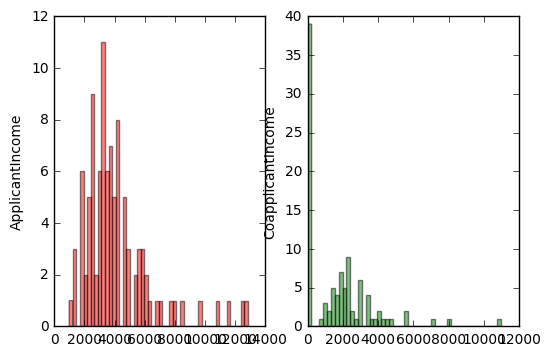

In [4]:
#train_df['ApplicantIncome'].hist(bins=50)

fig, ax = plt.subplots(1,2)
ax[0].hist(train_df['ApplicantIncome'], bins=50, alpha = 0.5, color = 'r')
ax[0].set_ylabel('ApplicantIncome')
ax[1].hist(train_df['CoapplicantIncome'], bins=50, alpha = 0.5, color = 'g')
ax[1].set_ylabel('CoapplicantIncome')
plt.show()

ValueError: max must be larger than min in range parameter.

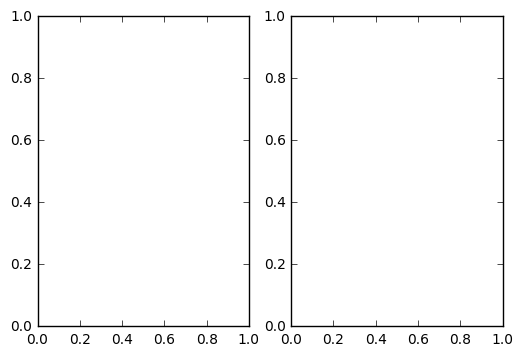

In [5]:
fig, ax2 = plt.subplots(1,2)
ax2[0].hist(train_df['LoanAmount'], bins=50, alpha = 0.5, color = 'r')
ax2[0].set_ylabel('LoanAmount')
ax2[1].hist(train_df['Loan_Amount_Term'], bins=50, alpha = 0.5, color = 'g')
ax2[1].set_ylabel('Loan_Amount_Term')
plt.show()

In [ ]:
train_df['CoapplicantIncome'].hist(bins=50)

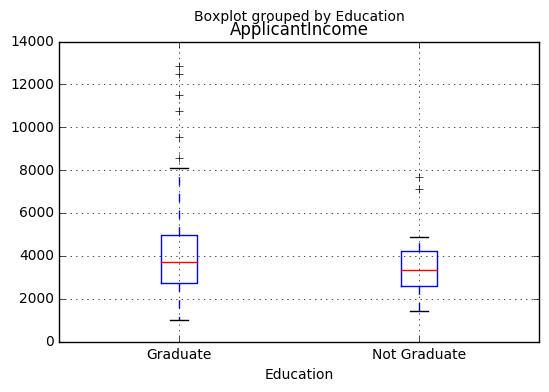

In [25]:
train_df.boxplot(column='ApplicantIncome', by = 'Education')

Creating pivot tables

In [6]:
temp1 = train_df['Credit_History'].value_counts(ascending=True)
temp2 = train_df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:') 
print(temp1)

print('\nProbility of getting loan for each Credit History class:' )
print(temp2)

Frequency Table for Credit History:
0.0    15
1.0    77
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
Credit_History
0.0    0.000000
1.0    0.779221
Name: Loan_Status, dtype: float64


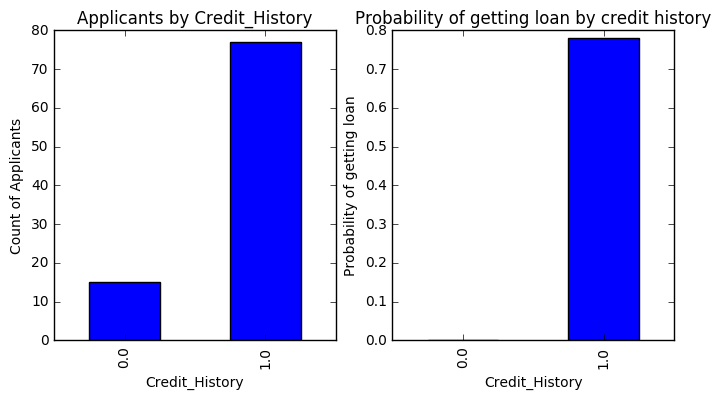

In [6]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

In [7]:
temp1 = train_df['Credit_History'].value_counts(ascending=True)
temp2 = train_df.pivot_table(values='Loan_Status',index=['Credit_History','Gender','Education'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:') 
print(temp1)

print('\nProbility of getting loan for each Credit History class:' )
print(temp2)

Frequency Table for Credit History:
0.0    15
1.0    77
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
Credit_History  Gender  Education   
0.0             F       Graduate        0.000000
                M       Graduate        0.000000
                        Not Graduate    0.000000
1.0             F       Graduate        0.777778
                        Not Graduate    1.000000
                M       Graduate        0.759259
                        Not Graduate    0.846154
Name: Loan_Status, dtype: float64


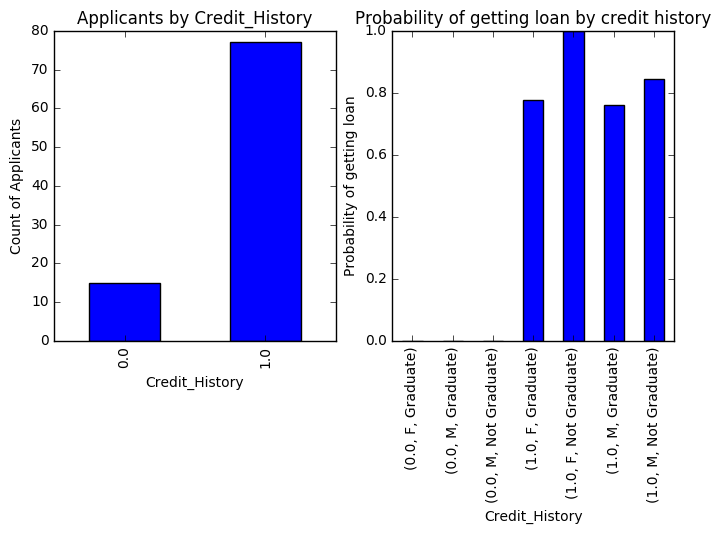

In [34]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar',stacked=True)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

Loan_Status      N   Y
Credit_History        
0.0             15   0
1.0             17  60


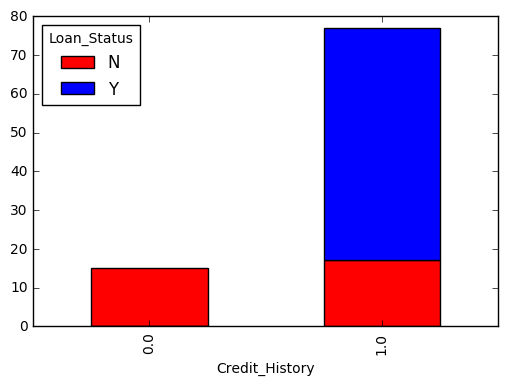

In [35]:
temp3 = pd.crosstab(train_df['Credit_History'], train_df['Loan_Status'])
print(str(temp3))
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [8]:
df = train_df

checking null values

In [9]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 

Application_ID       0
Gender               1
Married              0
Dependents           0
Education            0
Self_Employed        6
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     5
Credit_History       8
Property_Area        0
Loan_Status          0
dtype: int64

imputing missing values

In [38]:
# df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

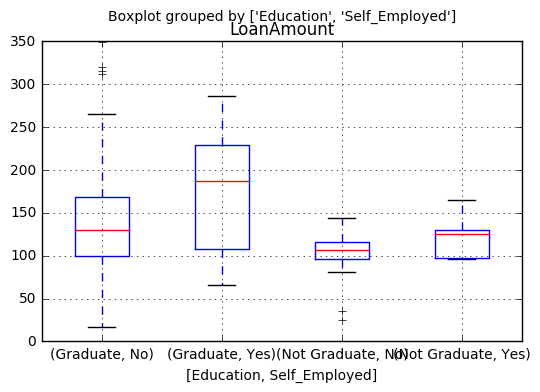

In [10]:
train_df.boxplot(column='LoanAmount', by = ['Education','Self_Employed'])

In [10]:
df['Self_Employed'].value_counts()

No     81
Yes    13
Name: Self_Employed, dtype: int64

Since ~81% values are “No”, it is safe to impute the missing values as “No” as there is a high probability of success. 

In [11]:
df['Self_Employed'].fillna('No',inplace=True)

In [12]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
print(table)

Education      Graduate  Not Graduate
Self_Employed                        
No                128.0         107.0
Yes               187.0         125.0


In [13]:
table = df.pivot_table(values='LoanAmount', index=['Self_Employed' ,'Education'], aggfunc=np.median)
print(table)

Self_Employed  Education   
No             Graduate        128.0
               Not Graduate    107.0
Yes            Graduate        187.0
               Not Graduate    125.0
Name: LoanAmount, dtype: float64


In [14]:
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

In [15]:
# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

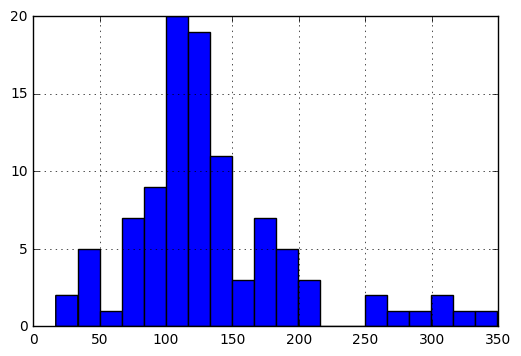

In [15]:
df['LoanAmount'].hist(bins=20)

Dealing with outliers

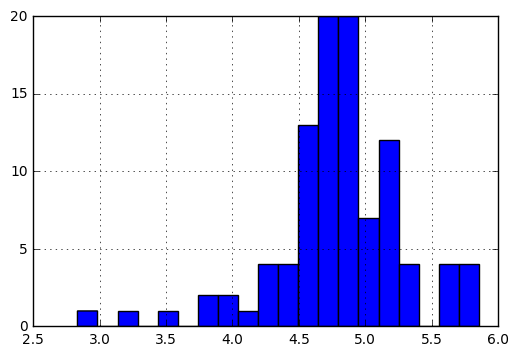

In [16]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

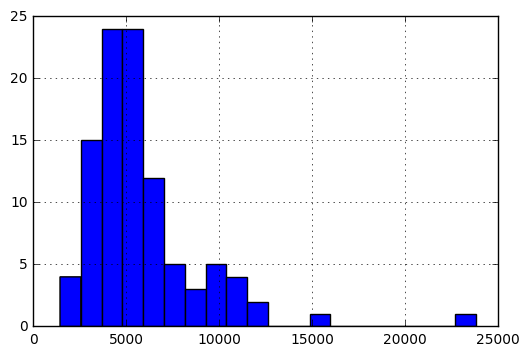

In [17]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome'].hist(bins=20)

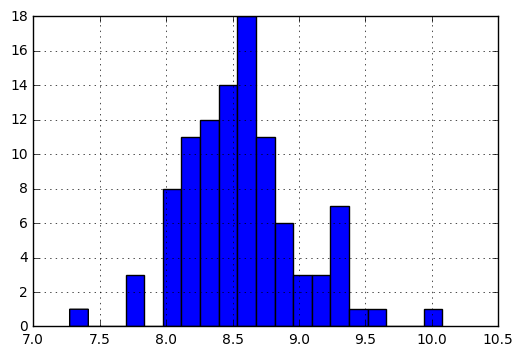

In [18]:
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20) 

checking what kind of people dont have credit history

In [19]:
table_credit_history = df.pivot_table(values='Credit_History', index=['Gender','Self_Employed' ,'Education'], aggfunc=np.mean)

print(table_credit_history)

Gender  Self_Employed  Education   
F       No             Graduate        0.692308
                       Not Graduate    1.000000
        Yes            Graduate        0.000000
M       No             Graduate        0.921569
                       Not Graduate    0.714286
        Yes            Graduate        1.000000
                       Not Graduate    0.750000
Name: Credit_History, dtype: float64


In [20]:
# Replace missing values
df['Credit_History'].fillna(df[df['Credit_History'].isnull()].apply(lambda x: 0 if x['Gender'] =='F' and x['Self_Employed'] == 'Yes' and x['Education'] == 'Graduate' else 1, axis=1), inplace=True)

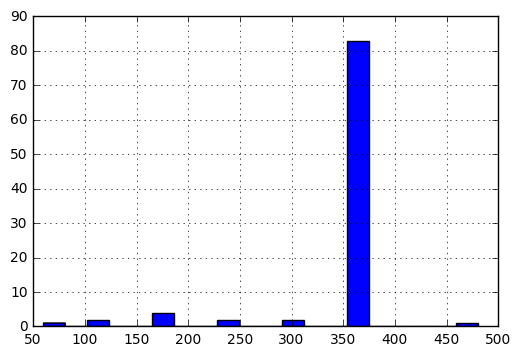

In [21]:
df['Loan_Amount_Term'].hist(bins=20)

In [22]:
table_Loan_Amount_Term = df.pivot_table(values='Loan_Amount_Term', index=['Credit_History','Gender','Self_Employed' ,'Education'], aggfunc=np.mean)

print(table_Loan_Amount_Term)

Credit_History  Gender  Self_Employed  Education   
0.0             F       No             Graduate        360.000000
                        Yes            Graduate        360.000000
                M       No             Graduate        340.000000
                                       Not Graduate    300.000000
                        Yes            Not Graduate    180.000000
1.0             F       No             Graduate        360.000000
                                       Not Graduate    360.000000
                M       No             Graduate        350.588235
                                       Not Graduate    315.000000
                        Yes            Graduate        360.000000
                                       Not Graduate    260.000000
Name: Loan_Amount_Term, dtype: float64


In [23]:
df['Loan_Amount_Term'].fillna(360,inplace=True)

In [24]:
df['Gender'].value_counts()

M    84
F    15
Name: Gender, dtype: int64

In [25]:
df['Gender'].fillna('M',inplace=True)

In [26]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 

Application_ID       0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [74]:
 test_df.apply(lambda x: sum(x.isnull()),axis=0) 

Application_ID        0
Gender               12
Married               3
Dependents           15
Education             0
Self_Employed        26
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           17
Loan_Amount_Term      9
Credit_History       42
Property_Area         0
dtype: int64

Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status','LoanAmount','TotalIncome','TotalIncome_log','LoanAmount_log']
le = LabelEncoder()
for i in var_mod:
    print(i)
    df[i] = le.fit_transform(df[i])
df.dtypes 

Gender
Married
Dependents
Education
Self_Employed
Loan_Amount_Term
Credit_History
Property_Area
Loan_Status
LoanAmount
TotalIncome
TotalIncome_log
LoanAmount_log


Application_ID       int64
Gender               int64
Married              int64
Dependents           int64
Education            int64
Self_Employed        int64
ApplicantIncome      int64
CoapplicantIncome    int64
LoanAmount           int64
Loan_Amount_Term     int64
Credit_History       int64
Property_Area        int64
Loan_Status          int64
LoanAmount_log       int64
TotalIncome          int64
TotalIncome_log      int64
dtype: object

In [30]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

from sklearn.metrics import fbeta_score, accuracy_score
# time.time() return time in seconds since the Epoch
from time import time


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
Loan_Status = df['Loan_Status']

df = df.drop(['Loan_Status','Application_ID'], axis = 1)

In [70]:
# Import train_test_split
from sklearn.cross_validation import train_test_split


# Split the 'features' and 'transaction_type' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, Loan_Status, test_size = 0.2, random_state = 0)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 80 samples.
Testing set has 20 samples.


In [26]:
beta = 0.5
#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
    model.fit(data[predictors],data[outcome])

    #Make predictions on training set:
    predictions = model.predict(data[predictors])

    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    f_train = []
    f_test = []
    for train, test in kf:
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
        
        test_predictors = (data[predictors].iloc[test, :])

        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
        
        
        test_target = data[outcome].iloc[test]
        #print(test_target.shape)

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
        
        predictions_test = model.predict(test_predictors)
        predictions_train = model.predict(train_predictors)

        
        # TODO: Compute F-score on the the first 300 training samples
        f_train.append(fbeta_score(train_target, predictions_train, beta=beta))

        # TODO: Compute F-score on the test set
        f_test.append(fbeta_score(test_target, predictions_test, beta=beta))


        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))

    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    print("F-Beta Score on train : %s" % "{0:.3%}".format(np.mean(f_train)))
    print("F-Beta Score on test: %s" % "{0:.3%}".format(np.mean(f_test)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome]) 

In [38]:

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test,predictors=[]): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    if len(predictors) == 0:
        predictors = list(X_train.columns)
    results = {}
    
    print("predictors are : "+ str(predictors))
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    X_train = X_train[:sample_size]
    y_train = y_train[:sample_size]
    
    start = time() # Get start time
    learner.fit(X_train, y_train)
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train, predictions_train)
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train, predictions_train, beta=beta)
        
   # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=beta)
     
    print("overall accuracy on train :  %s" % "{0:.3%}".format(results['acc_train'])) 
    print("overall accuracy on test :  %s" % "{0:.3%}".format(results['acc_test'])) 
    
    print("F-Beta Score on train :  %s" % "{0:.3%}".format(results['f_train']))
    print("F-Beta Score on test :  %s" % "{0:.3%}".format(results['f_test']))
    # Success
    #print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    #Perform k-fold cross-validation with 5 folds
    kf = KFold(X_train.shape[0], n_folds=5)
    error = []
    f_train = []
    f_test = []
    for train, test in kf:
        # Filter training data
        train_predictors = (X_train[predictors].iloc[train,:])
        
        test_predictors = (X_train[predictors].iloc[test, :])

        # The target we're using to train the algorithm.
        train_target = y_train.iloc[train]
        
        
        test_target = y_train.iloc[test]
        #print(test_target.shape)

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
        
        predictions_test = model.predict(test_predictors)
        predictions_train = model.predict(train_predictors)

        
        # TODO: Compute F-score on the the first 300 training samples
        f_train.append(fbeta_score(train_target, predictions_train, beta=beta))

        # TODO: Compute F-score on the test set
        f_test.append(fbeta_score(test_target, predictions_test, beta=beta))


        #Record error from each cross-validation run
        error.append(model.score(X_train[predictors].iloc[test,:], y_train.iloc[test]))

    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    print("CV F-Beta Score on train : %s" % "{0:.3%}".format(np.mean(f_train)))
    print("CV F-Beta Score on test: %s" % "{0:.3%}".format(np.mean(f_test)))
       
    # Return the results
    return results

In [28]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
#classification_model(model, ,predictor_var,outcome_var)
train_predict(model, len(y_train), X_train, y_train, X_test, y_test,predictor_var)


overall accuracy on train :  86.250%
overall accuracy on test :  75.000%
F-Beta Score on train :  86.207%
F-Beta Score on test :  69.231%
Cross-Validation Score : 81.250%
CV F-Beta Score on train : 82.073%
CV F-Beta Score on test: 81.823%


{'acc_test': 0.75,
 'acc_train': 0.86250000000000004,
 'f_test': 0.69230769230769229,
 'f_train': 0.86206896551724155,
 'pred_time': 0.0004394054412841797,
 'train_time': 0.0021750926971435547}

In [75]:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
model = LogisticRegression()
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
#classification_model(model, ,predictor_var,outcome_var)
train_predict(model, len(y_train), X_train, y_train, X_test, y_test,predictor_var)



overall accuracy on train :  86.250%
overall accuracy on test :  75.000%
F-Beta Score on train :  86.207%
F-Beta Score on test :  69.231%
Cross-Validation Score : 81.250%
CV F-Beta Score on train : 82.073%
CV F-Beta Score on test: 81.823%


{'acc_test': 0.75,
 'acc_train': 0.86250000000000004,
 'f_test': 0.69230769230769229,
 'f_train': 0.86206896551724155,
 'pred_time': 0.00037217140197753906,
 'train_time': 0.0018079280853271484}

https://github.com/emanuele/kaggle_pbr

In [47]:
beta = 1
model = LogisticRegression()
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
                 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
                 'LoanAmount_log','TotalIncome_log']
#classification_model(model,df ,predictor_var,outcome_var)
train_predict(model, len(y_train), X_train, y_train, X_test, y_test,predictor_var)

predictions_logistic = model.predict(X_test[predictor_var])
print(predictions_logistic[:5])

predictors are : ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'LoanAmount', 'TotalIncome']
overall accuracy on train :  86.250%
overall accuracy on test :  75.000%
F-Beta Score on train :  90.909%
F-Beta Score on test :  78.261%
Cross-Validation Score : 75.000%
CV F-Beta Score on train : 88.830%
CV F-Beta Score on test: 83.735%
[1 1 1 1 1]


In [43]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
43,1,1,0,0,0,3941,2336,37,5,1,1,37,74,74
62,1,1,0,1,1,2609,3449,45,2,0,0,45,67,67
3,1,1,0,1,0,2583,2358,29,5,1,2,29,44,44
71,1,1,2,1,1,1875,1875,16,5,1,1,16,20,20
45,0,0,0,0,0,3410,0,13,5,1,2,13,12,12


In [52]:
model = DecisionTreeClassifier()
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
                 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
                 'LoanAmount_log','TotalIncome_log']
train_predict(model, len(y_train), X_train, y_train, X_test, y_test,predictor_var)

predictions_Decision = model.predict(X_test[predictor_var])
print(predictions_Decision[:5])

predictors are : ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'LoanAmount_log', 'TotalIncome_log']
overall accuracy on train :  100.000%
overall accuracy on test :  80.000%
F-Beta Score on train :  100.000%
F-Beta Score on test :  81.818%
Cross-Validation Score : 75.000%
CV F-Beta Score on train : 100.000%
CV F-Beta Score on test: 80.682%
[1 1 1 1 1]


In [48]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
train_predict(model, len(y_train), X_train, y_train, X_test, y_test,predictor_var)

predictions_Random = model.predict(X_test[predictor_var])
print(predictions_Random[:5])

predictors are : ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'LoanAmount_log', 'TotalIncome_log']
overall accuracy on train :  100.000%
overall accuracy on test :  75.000%
F-Beta Score on train :  100.000%
F-Beta Score on test :  78.261%
Cross-Validation Score : 80.000%
CV F-Beta Score on train : 100.000%
CV F-Beta Score on test: 85.876%
[1 1 1 1 1]


In [51]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection

model = GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=50)
kfold = model_selection.KFold(n_splits=5)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
train_predict(model, len(y_train), X_train, y_train, X_test, y_test,predictor_var)

predictions_Gradient = model.predict(X_test[predictor_var])
print(predictions_Gradient[:5])

0.85
predictors are : ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'LoanAmount_log', 'TotalIncome_log']
overall accuracy on train :  98.750%
overall accuracy on test :  75.000%
F-Beta Score on train :  99.099%
F-Beta Score on test :  78.261%
Cross-Validation Score : 82.500%
CV F-Beta Score on train : 100.000%
CV F-Beta Score on test: 87.839%
[1 1 1 1 1]


In [39]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.svm import LinearSVC, SVC
# TODO: Initialize the classifier
clf = LogisticRegression()
#clf = SVC()
# TODO: Create the parameters list you wish to tune
parameters = {'solver': ['newton-cg', 'lbfgs', 'sag'],
              'C': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
              'random_state': [None, 101, 20160101]}

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=beta)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

# show best parameters
print ("\nBest Classifier\n------")
print (best_clf)

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which 

Unoptimized model
------
Accuracy score on testing data: 0.7500
F-score on testing data: 0.6923

Optimized Model
------
Final accuracy score on the testing data: 0.7500
Final F-score on the testing data: 0.7018

Best Classifier
------
LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [33]:
#score with logistic regresssion
beta =1
train_predict(best_clf, len(y_train), X_train, y_train, X_test, y_test)

overall accuracy on train :  82.500%
overall accuracy on test :  75.000%
F-Beta Score on train :  88.136%
F-Beta Score on test :  76.190%
Cross-Validation Score : 75.000%
CV F-Beta Score on train : 89.161%
CV F-Beta Score on test: 82.846%


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


{'acc_test': 0.75,
 'acc_train': 0.82499999999999996,
 'f_test': 0.76190476190476197,
 'f_train': 0.8813559322033897,
 'pred_time': 0.0004508495330810547,
 'train_time': 0.13468265533447266}

In [71]:

X = X_train.as_matrix()
y= y_train.as_matrix()
X_submission = X_test.as_matrix()
y_check_test = y_test.as_matrix()

In [83]:
from sklearn.cross_validation import StratifiedKFold
np.random.seed(0)  # seed to shuffle the train set

n_folds = 10
verbose = True
shuffle = False


if shuffle:
    idx = np.random.permutation(y.size)
    X = X[idx]
    y = y[idx]

skf = list(StratifiedKFold(y, n_folds))

clfs = [RandomForestClassifier(n_estimators=100, n_jobs=-1, criterion='gini'),
        LogisticRegression(),
        DecisionTreeClassifier(),
#        ExtraTreesClassifier(n_estimators=100, n_jobs=-1, criterion='entropy'),
        GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=50)]

print ("Creating train and test sets for blending.")

dataset_blend_train = np.zeros((X.shape[0], len(clfs)))
dataset_blend_test = np.zeros((X_submission.shape[0], len(clfs)))

for j, clf in enumerate(clfs):
    print(j, clf)
    dataset_blend_test_j = np.zeros((X_submission.shape[0], len(skf)))
    for i, (train, test) in enumerate(skf):
        print("Fold", i)
        
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]
        clf.fit(X_train, y_train)
        y_submission = clf.predict_proba(X_test)[:, 1]
        dataset_blend_train[test, j] = y_submission
        dataset_blend_test_j[:, i] = clf.predict_proba(X_submission)[:, 1]
    dataset_blend_test[:, j] = dataset_blend_test_j.mean(1)


print ("Blending.")
clf = LogisticRegression()
clf.fit(dataset_blend_train, y)
#y_submission = clf.predict_proba(dataset_blend_test)[:, 1]
y_submission = clf.predict(dataset_blend_test)


#print("Linear stretch of predictions to [0,1]")
#y_submission = (y_submission - y_submission.min()) / (y_submission.max() - y_submission.min())


Creating train and test sets for blending.
0 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
1 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
2 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e

In [76]:
y_check_test.shape

(20,)

In [81]:
y_check_test[:5]

array([1, 1, 1, 1, 0])

In [85]:
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_check_test, y_submission)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_check_test, y_submission, beta = 1)))

Accuracy score on testing data: 0.7500
F-score on testing data: 0.7826


In [80]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

Credit_History     0.312508
Property_Area      0.304648
TotalIncome_log    0.171858
LoanAmount_log     0.144444
Dependents         0.066542
dtype: float64


In [81]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
train_predict(model, len(y_train), X_train, y_train, X_test, y_test,predictor_var)

overall accuracy on train :  73.750%
overall accuracy on test :  45.000%
F-Beta Score on train :  76.602%
F-Beta Score on test :  50.562%
Cross-Validation Score : 86.250%
CV F-Beta Score on train : 86.507%
CV F-Beta Score on test: 85.835%


{'acc_test': 0.45000000000000001,
 'acc_train': 0.73750000000000004,
 'f_test': 0.5056179775280899,
 'f_train': 0.76601671309192199,
 'pred_time': 0.006369829177856445,
 'train_time': 0.03883790969848633}

In [ ]:
from sklearn.externals import joblib

best_clf= clf_A
filename = 'logistic_regression_model_invesco.joblib.pkl'

_ = joblib.dump(best_clf, filename, compress=9)

In [ ]:
print(best_clf)

clf_loaded = joblib.load(filename)

print(clf_loaded)

In [ ]:
pred = clf_loaded.predict(test)

In [ ]:
pred_df= pd.DataFrame(pred,columns=["Loan_Status"])

pred_df=pred_df.replace([0,1],['NO','YES'])
pred_df.head()

In [ ]:
result = pd.concat([test_df['Application_ID'], pred_df], axis=1)

result.head()

In [ ]:
result.shape

In [ ]:
result.to_csv('test_data.csv',index=False)